<a href="https://colab.research.google.com/github/Mendes1302/Python-Learning/blob/master/EMISSION%20OF%20C02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [2]:
!pip3 install wget #para fazer o Download
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=1f49d433c4e117e7d7a23db56f6b7128043bc519e8472033127a727b755ed984
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
--2021-01-02 17:52:21--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.01s   

2021-01-02 17:52:22 (6.26 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



In [3]:
# Cria dataset em CSV
data = pd.read_csv("FuelConsumptionCo2.csv")

print(data.head())

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


In [4]:
print(data.describe())

       MODELYEAR   ENGINESIZE  ...  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
count     1067.0  1067.000000  ...               1067.000000   1067.000000
mean      2014.0     3.346298  ...                 26.441425    256.228679
std          0.0     1.415895  ...                  7.468702     63.372304
min       2014.0     1.000000  ...                 11.000000    108.000000
25%       2014.0     2.000000  ...                 21.000000    207.000000
50%       2014.0     3.400000  ...                 26.000000    251.000000
75%       2014.0     4.300000  ...                 31.000000    294.000000
max       2014.0     8.400000  ...                 60.000000    488.000000

[8 rows x 8 columns]


#SELECIONAR ALGUMAS FEATURES

In [8]:
motores = data[['ENGINESIZE']]
co2 = data[['CO2EMISSIONS']]
print(motores.head())
print('\n', co2.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5

    CO2EMISSIONS
0           196
1           221
2           136
3           255
4           244


#Dividir o dataset em TESTE e TREINO

In [9]:
motores_train, motores_test, co2_train, co2_test = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_train))

<class 'pandas.core.frame.DataFrame'>


#Exibir a correlação entre as FEATURES do dataset de treino

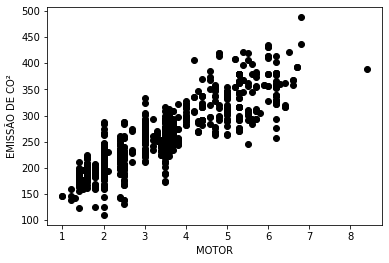

In [16]:
plt.scatter(motores_train, co2_train, color='black')
plt.xlabel("MOTOR")
plt.ylabel("EMISSÃO DE CO²")
plt.show()

#Treinar o modelo de regressão linear

In [13]:
# Cria o modelo
modelo = linear_model.LinearRegression()

# Encontrar A e B (y = A + B.x)
modelo.fit(motores_train, co2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#EXIBIR COEFICIENTES (A e B)

In [14]:
print('[A] Intercepto:  ', modelo.intercept_)
print('[B] Inclinação:  ', modelo.coef_)

[A] Intercepto:   [126.28970217]
[B] Inclinação:   [[38.99297872]]


# RETA DA REGRESSÃO LINEAR (treino)

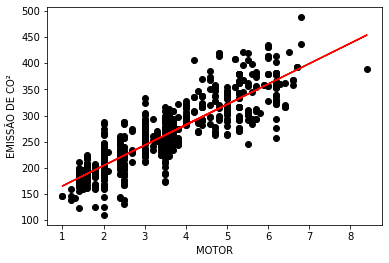

In [17]:
plt.scatter(motores_train, co2_train, color='black')
plt.plot(motores_train, modelo.coef_[0][0]*motores_train+modelo.intercept_[0], '-r')
plt.xlabel("MOTOR")
plt.ylabel("EMISSÃO DE CO²")
plt.show()

# Executar o modelo no dataset de teste

In [19]:
predicoesCo2 = modelo.predict(motores_test)

# RETA DA REGRESSÃO LINEAR (teste)

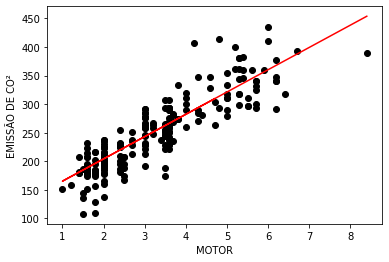

In [20]:
plt.scatter(motores_test, co2_test, color='black')
plt.plot(motores_test, modelo.coef_[0][0]*motores_test+modelo.intercept_[0], '-r')
plt.xlabel("MOTOR")
plt.ylabel("EMISSÃO DE CO²")
plt.show()

# Avaliar modelo:

In [23]:
print('Soma dos Erros ao Quadrado (SSE): %2.f' % np.sum((predicoesCo2 - co2_test)**2))
print('Erro Quadrático Médio (MSE): %.2f' % mean_squared_error(co2_test, predicoesCo2))
print('Erro Médio Absoluto (MAE): %.2f' % mean_absolute_error(co2_test, predicoesCo2))
print('Raiz do Erro Quadrático Médio (RMSE): %.2f' % sqrt(mean_squared_error(co2_test, predicoesCo2)))
print('R2-score: %.2f' % r2_score(predicoesCo2, co2_test))




Soma dos Erros ao Quadrado (SSE): 210991
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40
R2-score: 0.68
